# Trabalho 1 - Vias

2 de outubro de 2023

Paulo Jorge Fernandes Freitas   - A100053
&
Pedro Manuel Pereira dos Santos - A100110

## Enunciado:

2.  Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido. O grafo tem de ser ligado: entre cada par de nodos n1, n2 tem de existir um caminho n1 a n2 e um caminho n2 a n1.
    1. Gerar aleatoriamente o grafo com  N de 8..15 nodos e com ramos verificando:
        1. Cada nodo tem um número aleatório de descendentes d de 0..3, cujos destinos são também gerados aleatoriamente. 
        2. Se  existirem “loops”  ou destinos repetidos, deve-se gerar outro grafo.
    2. Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

## Análise do problema

Este é um problema de geração de um grafo orientado ligado aleatório com 8 a 15 nodos, cada um tendo 0 a 3 descendentes sem existencia de loops ou destinos repetidos.

Após a geração do grafo correto, temos de verificar o máximo de arestas que podem ser removidas para o grafo continuar a ser ligado.

**Variáveis:**

N -> número de nodos  
G -> grafo gerado  
d -> número de descendentes  
descendants -> sample aleatória dos descendentes  
node -> nodo  
sucess, elem -> lista dos descendentes de node  
s -> nodo da lista dos descendentes de node  
new -> cópia de sucess removendo um nodo "s"  
GC -> cópia do grafo sem uma aresta  
remov -> arestas possíveis a remover  

## Implementação  

Começamos por importar a biblioteca de grafos networkx como nx para um uso mais cómodo e a biblioteca random para gerar números aleatórios.

In [1]:
import networkx as nx
import random

Agora a função que gera um N aleatório com d aleatórios para cada N e assim criando o grafo com essas propriedades.

In [2]:
def random_graph():
    N = random.randint(8, 15)
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    for node in G.nodes():
        num_descendants = random.randint(0, 3)
        descendants = random.sample(list(G.nodes()), num_descendants)
        for descendant in descendants:
            G.add_edge(node, descendant)
    return G

### Restrições

Função que analisa um grafo e verifica se existe loops ou destinos repetidos em cada nodo

In [3]:
def has_duplicate_destinations(graph):
    for node in graph.nodes():
        sucess = list(graph.successors(node))
        for s in sucess:
            new = sucess.copy()
            new.remove(s)
            if s in new or node in new:
                return True
    return False

Loop da geração do grafo até as restrições estiverem cumpridas usando has_duplicate_destinations (a nossa função) e is_strongly_connected (funções de networkx) que analisa se o grafo é ligado com sentido nas arestas.

In [4]:
G = random_graph()

while (not nx.is_strongly_connected(G)) or has_duplicate_destinations(G):
    G = random_graph()

Após a geração de um grafo com as condições pedidas é analisado recursivamente (para verificar todas as combinações de remoção) o máximo de arestas possíveis removiveis que façam com que o grafo continue a ser ligado.

In [5]:
def rec(graph, lista, i, ret, j):
    if i >= len(lista):
        return ret
    elem = list(graph.successors(lista[i]))
    if j >= len(elem):
        return rec(graph, lista, i+1, ret, 0)
    GC = graph.copy()
    GC.remove_edge(lista[i], elem[j])
    if nx.is_strongly_connected(GC):
        return max(rec(graph, lista, i, ret, j+1), 
                   rec(GC, list(GC.nodes()), i, ret+1, j))
    return rec(graph, lista, i, ret, j+1)

remov = rec(G, list(G.nodes()), 0, 0, 0)

### Impressão dos resultados

DiGraph with 9 nodes and 21 edges
É possível ter 11 vias em manutenção


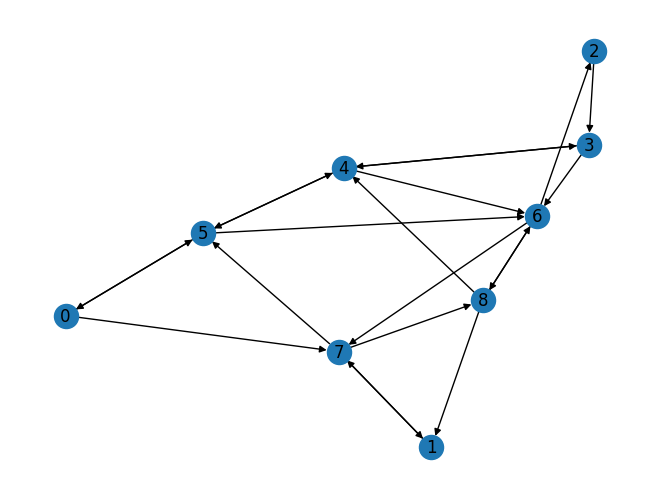

In [6]:
print(G)
print("É possível ter", remov, "vias em manutenção")
nx.draw(G, with_labels=True)